In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plt_conf as conf


from rutinas_AutoInt import Freq_solveG2, profilesFromSolut, extend, system
from scipy.interpolate import interp1d

In [4]:
conf.general()  # If Latex is not installed, please comment this line

### Ground state (n=0)

In [5]:
##########################
# Shooting the background solutions
##########################

Umax = 6.8
Umin = 5.8
nodos = 0
alf = 1
rmin = 0
rmax = 1e03
Lamb = 1
met = 'DOP853'
Rtol= 1e-13
Atol = 1e-15
f0val = np.arange(1., 2.31, 0.1)

datos = []
for i in [2.4, 2.5]:  # f0val
    f0 = i 
    U0, rTemp, posNodos = Freq_solveG2(f0, Umax, Umin, Lamb, alf, rmax, rmin, nodos,met=met,
                                  Rtol=Rtol, Atol=Atol)

    datos.append([f0, rTemp, alf, Lamb, nodos, posNodos, met, Rtol, Atol, U0])

Finding a profile with  0 nodes


In [4]:
soluciones_Fondo = [
  [1.0, 20.452599130488608, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 1.4796444065743466],
  [1.1, 18.838862972201714, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 1.7039320328288312],
  [1.2000000000000002, 17.89150978969139, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 1.9448244637167793],
  [1.3000000000000003, 17.043475154579554, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 2.2028831811633363],
  [1.4000000000000004, 16.27404922468543, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 2.4786140920630775],
  [1.5000000000000004, 15.615810483265468, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 2.772465280204316],
  [1.6, 14.840187490757357, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 3.08482679516682],
  [1.7000000000000006, 15.033312825188228, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 3.416032282457605],
  [1.8000000000000007, 13.77880453598122, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 3.7663621440933994],
  [1.9, 13.418833844423574, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 4.136047850893861],
  [2.0, 13.358631813405243, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 4.525277007865226],
  [2.1, 13.05004558947261, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 4.934198795507044],
  [2.2, 12.323096259285396, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 5.362929461232017],
  [2.3, 11.775351931526792, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 5.811557603372564]
]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_3154/964416682.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))


(0.0, 80.0)

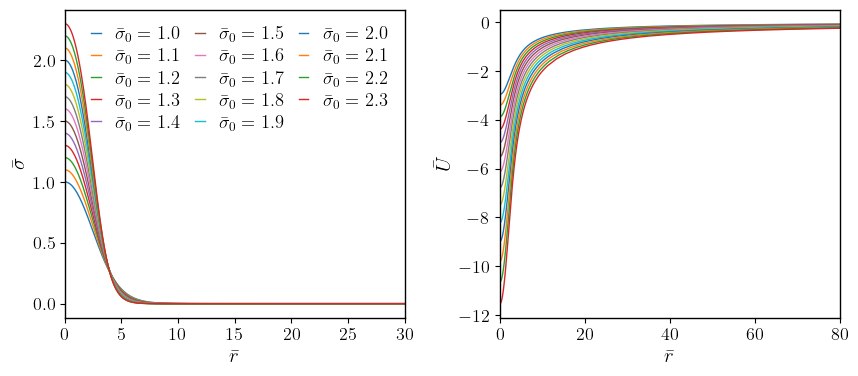

In [5]:
##########################
# Next, we extend the scalar and effective potential solutions to large values of r
# using their asymptotic behavior. The procedure is described in Sec. III.A of arXiv:2302.00717.
##########################

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))
rstep = 0.05
ri = np.arange(0, 100, rstep)

Ncasos = range(len(soluciones_Fondo))
datosProfiles = [ri]
datosEn = []
for i in Ncasos:
    datBG = soluciones_Fondo[i]
    s0 = datBG[0]
    r0M = datBG[1]
    Ext = (s0*r0M)+7000
    Np = int(Ext/2)
    rtake = -160   # index taken as start point to fit with the asymptotic solution
    
    # solving
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = profilesFromSolut(datBG, Nptos=3000) 
    # extending
    rDnew, sDnew, dsDnew, uDnew, duDnew, datosEquiv = extend(rD[:rtake], sD[:rtake], dsD[:rtake], uD[:rtake], duD[:rtake],
                                                                Ext, Np, inf=False)

    # interpolating
    fsN = interp1d(rDnew, sDnew, kind='linear') # quadratic
    fdsN = interp1d(rDnew, dsDnew, kind='linear')
    fuN = interp1d(rDnew, uDnew, kind='linear')
    fduN = interp1d(rDnew, duDnew, kind='linear')
    
    # energy
    _, En, _ = datosEquiv  # M -> K
    datosEn.append(En)
    
    # saving and plot
    sni = fsN(ri)
    datosProfiles.append(sni)
    Ub = En - fuN(ri)  # remember that u(r) := E − U(r),
    datosProfiles.append(Ub)

    ax[0].plot(ri, sni, lw=1, label=r'$\bar{\sigma}_0=%2.1f$'%s0)
    ax[1].plot(ri, Ub, lw=1)

ax[0].set_xlabel(r'$\bar{r}$')
ax[1].set_xlabel(r'$\bar{r}$')
ax[0].set_ylabel(r'$\bar{\sigma}$')
ax[1].set_ylabel(r'$\bar{U}$')

ax[0].legend(frameon=False, ncols=3, labelspacing=0.3,
             columnspacing=0.8, handlelength=0.5, fontsize='small')
ax[0].set_xlim(0, 30)
ax[1].set_xlim(0, 80)

In [6]:
# creating the tables

columName = ['E', 'r_ours', 'U_our', 'sigma_ours', 'Psi_ours(t=0)', 'dot_Psi_ours(t=0)', 
             'r_yours', 'U_yours', 'sigma_yours', 'Psi_yours(t=0)', 'dot_Psi_yours(t=0)']

AllTables = []
rcol = pd.Series(data=datosProfiles[0])
k = 0
for i in range(1, len(datosProfiles), 2):
    En = datosEn[k]
    s = datosProfiles[i]
    
    Ecol = pd.Series(data=[En]*len(s))
    scol = pd.Series(data=s)
    Ucol = pd.Series(data=datosProfiles[i+1])
    Psicol = pd.Series(data=s)
    dotPsicol = pd.Series(data=-1j*En*s)
    k += 1
    
    FResult = pd.concat([Ecol, rcol, Ucol, scol, Psicol, dotPsicol,
                     rcol/(np.sqrt(2.)), Ucol, 2*scol, 2*Psicol, 2*dotPsicol], axis=1)
    FResult.columns = columName
    # Add
    AllTables.append(FResult)

In [7]:
AllTables[0].head(5)

,E,r_ours,U_our,sigma_ours,Psi_ours(t=0),dot_Psi_ours(t=0),r_yours,U_yours,sigma_yours,Psi_yours(t=0),dot_Psi_yours(t=0)
0,-1.477038,0.00,-2.956682,1.000000,1.000000,0.000000+1.477038j,0.000000,-2.956682,2.000000,2.000000,0.000000+2.954075j
1,-1.477038,0.05,-2.956264,0.999799,0.999799,0.000000+1.476741j,0.035355,-2.956264,1.999599,1.999599,0.000000+2.953483j
2,-1.477038,0.10,-2.955015,0.999200,0.999200,0.000000+1.475856j,0.070711,-2.955015,1.998400,1.998400,0.000000+2.951712j
3,-1.477038,0.15,-2.952936,0.998202,0.998202,0.000000+1.474383j,0.106066,-2.952936,1.996405,1.996405,0.000000+2.948765j
4,-1.477038,0.20,-2.950027,0.996805,0.996805,0.000000+1.472319j,0.141421,-2.950027,1.993610,1.993610,0.000000+2.944638j


In [8]:
# Saving
address = '/Users/armando/Library/Mobile Documents/com~apple~CloudDocs/GitHub/Data_GPP/Data/ground_state/'
for i in range(len(AllTables)):
    AllTables[i].to_csv(address+'table_%d'%i+'.csv', float_format='%.10f')

In [9]:
# test Load
i = 0
table_test = pd.read_csv(address+'table_%d'%i+'.csv', index_col=0)
table_test.head(5)

,E,r_ours,U_our,sigma_ours,Psi_ours(t=0),dot_Psi_ours(t=0),r_yours,U_yours,sigma_yours,Psi_yours(t=0),dot_Psi_yours(t=0)
0,-1.477038,0.00,-2.956682,1.000000,1.000000,1.4770377165936304j,0.000000,-2.956682,2.000000,2.000000,2.9540754331872607j
1,-1.477038,0.05,-2.956264,0.999799,0.999799,1.4767413321015643j,0.035355,-2.956264,1.999599,1.999599,2.9534826642031287j
2,-1.477038,0.10,-2.955015,0.999200,0.999200,1.475856070471783j,0.070711,-2.955015,1.998400,1.998400,2.951712140943566j
3,-1.477038,0.15,-2.952936,0.998202,0.998202,1.474382677524233j,0.106066,-2.952936,1.996405,1.996405,2.948765355048466j
4,-1.477038,0.20,-2.950027,0.996805,0.996805,1.472318833720043j,0.141421,-2.950027,1.993610,1.993610,2.944637667440086j


### First excited state (n=1)

In [8]:
##########################
# Shooting the background solutions
##########################

Umax = 5.8
Umin = 4.3
nodos = 1
alf = 1
rmin = 0
rmax = 1e03
Lamb = 1
met = 'DOP853'
Rtol= 1e-13
Atol = 1e-15
f0val = np.arange(1., 2.31, 0.1)

datos = []
for i in [2.1]:  #f0val:
    f0 = i 
    U0, rTemp, posNodos = Freq_solveG2(f0, Umax, Umin, Lamb, alf, rmax, rmin, nodos,met=met,
                                  Rtol=Rtol, Atol=Atol)

    datos.append([f0, rTemp, alf, Lamb, nodos, posNodos, met, Rtol, Atol, U0])

Finding a profile with  1 nodes
Maxima precisión alcanzada 5.078291142618261 radio 16.94547516234605


In [10]:
##########################
# Background solutions
##########################

soluciones_Fondo = [
 [1.0, 29.652546657047484, 1, 1, 1, [3.54927146], 'DOP853', 1e-13, 1e-15, 1.6676158758718183],
 [1.1, 25.575023983059893, 1, 1, 1, [3.40493004], 'DOP853', 1e-13, 1e-15, 1.8973992285466048],
 [1.2, 24.31251835665046, 1, 1, 1, [3.28030364], 'DOP853', 1e-13, 1e-15, 2.1413393735694877],
 [1.3, 22.737006939969984, 1, 1, 1, [3.17153756], 'DOP853', 1e-13, 1e-15, 2.400118792039998],
 [1.4, 21.9027909742071, 1, 1, 1, [3.07576168], 'DOP853', 1e-13, 1e-15, 2.674404562303061],
 [1.5, 20.684306633998997, 1, 1, 1, [2.99078841], 'DOP853', 1e-13, 1e-15, 2.964841238167417],
 [1.6, 20.205363707880586, 1, 1, 1, [2.91491635], 'DOP853', 1e-13, 1e-15, 3.272043958410948],
 [1.7, 19.06712251114312, 1, 1, 1, [2.84679861], 'DOP853', 1e-13, 1e-15, 3.5965920748514266],
 [1.8, 18.701521729858925, 1, 1, 1, [2.78535213], 'DOP853', 1e-13, 1e-15, 3.9390235753791183],
 [1.9, 18.482294958189055, 1, 1, 1, [2.72969363], 'DOP853', 1e-13, 1e-15, 4.29983054407142],
 [2.0, 17.15826283515138, 1, 1, 1, [2.67909365], 'DOP853', 1e-13, 1e-15, 4.679455844802967],
 [2.1, 16.912470543884144, 1, 1, 1, [2.63294281], 'DOP853', 1e-13, 1e-15, 5.078291142618261],
 [2.2, 15.974544591341973, 1, 1, 1, [2.59072677], 'DOP853', 1e-13, 1e-15, 5.496676295930912],
 [2.3, 15.3114884492194, 1, 1, 1, [2.55200738], 'DOP853', 1e-13, 1e-15, 5.934900070969566]
 ]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_3154/964416682.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))


(0.0, 80.0)

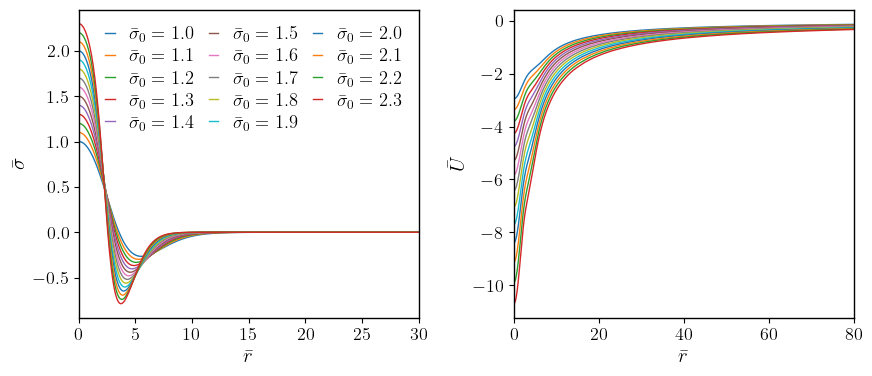

In [11]:
##########################
# Next, we extend the scalar and effective potential solutions to large values of r
# using their asymptotic behavior. The procedure is described in Sec. III.A of arXiv:2302.00717.
##########################

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))
rstep = 0.05
ri = np.arange(0, 100, rstep)

Ncasos = range(len(soluciones_Fondo))
datosProfiles = [ri]
datosEn = []
for i in Ncasos:
    datBG = soluciones_Fondo[i]
    s0 = datBG[0]
    r0M = datBG[1]
    Ext = (s0*r0M)+7000
    Np = int(Ext/2)
    rtake = -160   # index taken as start point to fit with the asymptotic solution
    
    # solving
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = profilesFromSolut(datBG, Nptos=3000) 
    # extending
    rDnew, sDnew, dsDnew, uDnew, duDnew, datosEquiv = extend(rD[:rtake], sD[:rtake], dsD[:rtake], uD[:rtake], duD[:rtake],
                                                                Ext, Np, inf=False)

    # interpolating
    fsN = interp1d(rDnew, sDnew, kind='linear') # quadratic
    fdsN = interp1d(rDnew, dsDnew, kind='linear')
    fuN = interp1d(rDnew, uDnew, kind='linear')
    fduN = interp1d(rDnew, duDnew, kind='linear')
    
    # energy
    _, En, _ = datosEquiv  # M -> K
    datosEn.append(En)
    
    # saving and plot
    sni = fsN(ri)
    datosProfiles.append(sni)
    Ub = En - fuN(ri)  # remember that u(r) := E − U(r),
    datosProfiles.append(Ub)

    ax[0].plot(ri, sni, lw=1, label=r'$\bar{\sigma}_0=%2.1f$'%s0)
    ax[1].plot(ri, Ub, lw=1)

ax[0].set_xlabel(r'$\bar{r}$')
ax[1].set_xlabel(r'$\bar{r}$')
ax[0].set_ylabel(r'$\bar{\sigma}$')
ax[1].set_ylabel(r'$\bar{U}$')

ax[0].legend(frameon=False, ncols=3, labelspacing=0.3,
             columnspacing=0.8, handlelength=0.5, fontsize='small')
ax[0].set_xlim(0, 30)
ax[1].set_xlim(0, 80)

In [12]:
# creating the tables

columName = ['E', 'r_ours', 'U_our', 'sigma_ours', 'Psi_ours(t=0)', 'dot_Psi_ours(t=0)', 
             'r_yours', 'U_yours', 'sigma_yours', 'Psi_yours(t=0)', 'dot_Psi_yours(t=0)']

AllTables = []
rcol = pd.Series(data=datosProfiles[0])
k = 0
for i in range(1, len(datosProfiles), 2):
    En = datosEn[k]
    s = datosProfiles[i]
    
    Ecol = pd.Series(data=[En]*len(s))
    scol = pd.Series(data=s)
    Ucol = pd.Series(data=datosProfiles[i+1])
    Psicol = pd.Series(data=s)
    dotPsicol = pd.Series(data=-1j*En*s)
    k += 1
    
    FResult = pd.concat([Ecol, rcol, Ucol, scol, Psicol, dotPsicol,
                     rcol/(np.sqrt(2.)), Ucol, 2*scol, 2*Psicol, 2*dotPsicol], axis=1)
    FResult.columns = columName
    # Add
    AllTables.append(FResult)

In [13]:
AllTables[0].head(5)

,E,r_ours,U_our,sigma_ours,Psi_ours(t=0),dot_Psi_ours(t=0),r_yours,U_yours,sigma_yours,Psi_yours(t=0),dot_Psi_yours(t=0)
0,-1.280617,0.00,-2.948232,1.000000,1.000000,0.000000+1.280617j,0.000000,-2.948232,2.000000,2.000000,0.000000+2.561233j
1,-1.280617,0.05,-2.947815,0.999721,0.999721,0.000000+1.280260j,0.035355,-2.947815,1.999442,1.999442,0.000000+2.560519j
2,-1.280617,0.10,-2.946565,0.998886,0.998886,0.000000+1.279190j,0.070711,-2.946565,1.997773,1.997773,0.000000+2.558381j
3,-1.280617,0.15,-2.944486,0.997495,0.997495,0.000000+1.277409j,0.106066,-2.944486,1.994991,1.994991,0.000000+2.554818j
4,-1.280617,0.20,-2.941581,0.995549,0.995549,0.000000+1.274916j,0.141421,-2.941581,1.991098,1.991098,0.000000+2.549833j


In [14]:
# Saving
address = '/Users/armando/Library/Mobile Documents/com~apple~CloudDocs/GitHub/Data_GPP/Data/first_excited_state/'
for i in range(len(AllTables)):
    AllTables[i].to_csv(address+'table_%d'%i+'.csv', float_format='%.10f')

In [15]:
# test Load
i = 0
table_test = pd.read_csv(address+'table_%d'%i+'.csv', index_col=0)
table_test.head(5)

,E,r_ours,U_our,sigma_ours,Psi_ours(t=0),dot_Psi_ours(t=0),r_yours,U_yours,sigma_yours,Psi_yours(t=0),dot_Psi_yours(t=0)
0,-1.280617,0.00,-2.948232,1.000000,1.000000,1.28061659901251j,0.000000,-2.948232,2.000000,2.000000,2.56123319802502j
1,-1.280617,0.05,-2.947815,0.999721,0.999721,1.280259625610599j,0.035355,-2.947815,1.999442,1.999442,2.560519251221198j
2,-1.280617,0.10,-2.946565,0.998886,0.998886,1.2791903797218098j,0.070711,-2.946565,1.997773,1.997773,2.5583807594436196j
3,-1.280617,0.15,-2.944486,0.997495,0.997495,1.2774091292571308j,0.106066,-2.944486,1.994991,1.994991,2.5548182585142616j
4,-1.280617,0.20,-2.941581,0.995549,0.995549,1.2749163253321j,0.141421,-2.941581,1.991098,1.991098,2.5498326506642j


### Testing equivalence

[Our](https://arxiv.org/pdf/2402.07998.pdf) system (9) is equivalent to [your](https://arxiv.org/pdf/2211.08433.pdf) system (2.12) (considering that $\psi_i = (\psi, 0, 0)$) if our initial conditions are rescale as follows:

\begin{equation}
\tilde{\psi}=2\psi, \quad \tilde{x}=x/\sqrt{2}, \quad \tilde{\lambda}=-\lambda/12 
\end{equation}

In our case, $\lambda$ take the values $0, \pm 1$. The remaining parameters, such as $u_0, E,$ remain unchanged.

In [4]:
from scipy.integrate import solve_ivp

In [5]:
def systemJain(r, V, arg):
    """
    Sistema de ecuaciones de primer orden
    f = campo, u = potencial
    Variables: f, df, u, du = V
    """
    f, df, u, du = V
    Lamb, alf = arg
    
    if r > 0:
        ddf = -2*f*u - 2*df/r - 2*Lamb*(f**3+2*f**3)
        ddu = -alf*f**2/2 - 2*du/r
        return [df, ddf, du, ddu]
    else:
        ddf = (-u*f+Lamb*f**3)/3
        ddu = -alf*f**2/3
        return [df, ddf, du, ddu]

In [14]:
        # [sigma0, rtest, alpha, Lambda, numb_nodos, position_of_nodos, method, Rtol, Rabs, u0]
dat_our = [2.2, 15.974544591341973, 1, 1, 1, [2.59072677], 'DOP853', 1e-13, 1e-15, 5.496676295930912]
dat_your = [2*2.2, 15.974544591341973/np.sqrt(2.), 1, 1*(-1/12), 1, [2.59072677/np.sqrt(2.)], 'DOP853', 1e-13, 1e-15, 5.496676295930912]

In [15]:
#### our
f0, rTemp, alf, Lam, nodos, posNodos, met, Rtol, Atol, U0 = dat_our

rmin = 0
V0 = [f0, 0., U0, 0.]  # sigma, dsigma, u, du
rspan = np.linspace(rmin, rTemp, 2000)
arg = [Lam, alf]

sol2 = solve_ivp(system, [rmin, rTemp], V0, t_eval=rspan,
                     args=(arg,), method=met, rtol=Rtol, atol=Atol)

rD_our, sD_our, dsD_our, uD_our, duD_our = sol2.t, sol2.y[0], sol2.y[1], sol2.y[2], sol2.y[3]

#### your
f0, rTemp, alf, Lam, nodos, posNodos, met, Rtol, Atol, U0 = dat_your

# boundary conditions
rmin = 0
V0 = [f0, 0., U0, 0.]  # sigma, dsigma, u, du
rspan = np.linspace(rmin, rTemp, 2000)
arg = [Lam, alf]

sol2 = solve_ivp(systemJain, [rmin, rTemp], V0, t_eval=rspan,
                     args=(arg,), method=met, rtol=Rtol, atol=Atol)

rD_your, sD_your, dsD_your, uD_your, duD_your = sol2.t, sol2.y[0], sol2.y[1], sol2.y[2], sol2.y[3]

In [16]:
# test Load
address = '/Users/armando/Library/Mobile Documents/com~apple~CloudDocs/GitHub/Data_GPP/Data/first_excited_state/'
i = 12
table_2_2 = pd.read_csv(address+'table_%d'%i+'.csv', index_col=0)
rS_our, sS_our = table_2_2['r_ours'], table_2_2['sigma_ours']
rS_your, sS_your = table_2_2['r_yours'], table_2_2['sigma_yours']

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_4643/4027983300.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))


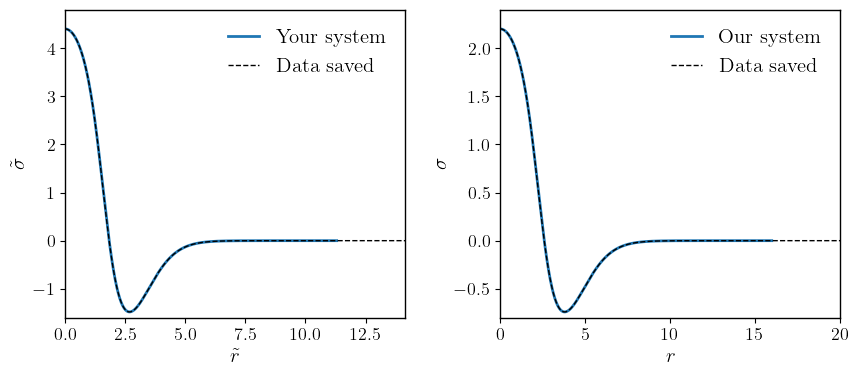

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(rD_your, sD_your, ls='-', label=r'Your system')
#ax[0].plot(dat_your[5], 0, marker='o', c='k', label=r'nodo position')
ax[0].plot(rS_your, sS_your, ls='--', lw=1, c='k', label=r'Data saved')

ax[0].set_xlim(0, 20/np.sqrt(2))
ax[0].set_ylim(-2*0.8, 2*2.4)
ax[0].set_xlabel(r'$\tilde r$')
ax[0].set_ylabel(r'$\tilde\sigma$')
ax[0].legend(frameon=False)

#####
ax[1].plot(rD_our, sD_our, ls='-', label=r'Our system')
#ax[1].plot(dat_our[5], 0, marker='o', c='k', label=r'nodo position')
ax[1].plot(rS_our, sS_our, ls='--', lw=1, c='k', label=r'Data saved')

ax[1].set_xlim(0, 20)
ax[1].set_ylim(-0.8, 2.4)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$\sigma$')
ax[1].legend(frameon=False)
